In [4]:
import numpy as np
import matplotlib.pyplot as plt
from functions import signal_formatting, signal_prediction
import h5py

2024-06-01 12:25:37.638931: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-01 12:25:37.698507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#just two signals for now; the following signal may be added: 
# /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/alobanov/phase2/menu/ntuples/13X/v29/GluGluHToTauTau_M-125_TuneCP5_14TeV-powheg-pythia8/HHToTauTau_131_200PU_v29_13x_fixTkPhi/230822_122705/0000/L1NtuplePhaseII_Step1_10.root 
#later on

In [2]:
#gluon gluon to gamma gamma
#f_gg = uproot.open("/eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/alobanov/phase2/menu/ntuples/13X/v29/GluGluHToGG_M-125_TuneCP5_14TeV-powheg-pythia8/GluGluHToGG_131_200PU_v29_13x_fixTkPhi/230822_122650/0000/L1NtuplePhaseII_Step1_10.root:l1PhaseIITree/L1PhaseIITree")

In [3]:
#vbf to tautau (already used before)
#f_vbf = uproot.open("/eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/alobanov/phase2/menu/ntuples/13X/v29/VBFHToTauTau_M-125_TuneCP5_14TeV-powheg-pythia8/VBFHToTauTau_131_200PU_v29_13x_fixTkPhi/230822_122634/0000/L1NtuplePhaseII_Step1_10.root:l1PhaseIITree/L1PhaseIITree")

In [2]:
vbf = "/eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/alobanov/phase2/menu/ntuples/13X/v29/VBFHToTauTau_M-125_TuneCP5_14TeV-powheg-pythia8/VBFHToTauTau_131_200PU_v29_13x_fixTkPhi/230822_122634/0000/L1NtuplePhaseII_Step1_10.root"
gg = "/eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/alobanov/phase2/menu/ntuples/13X/v29/GluGluHToGG_M-125_TuneCP5_14TeV-powheg-pythia8/GluGluHToGG_131_200PU_v29_13x_fixTkPhi/230822_122650/0000/L1NtuplePhaseII_Step1_10.root"

In [3]:
background = ["met_bkg.csv", 'electron_bkg', 'photon_bkg.csv', 'muon_bkg', 'tau_bkg.csv', 'jet_bkg.csv']


## Signal stuff

<Figure size 432x288 with 0 Axes>

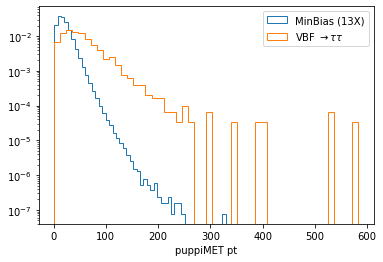

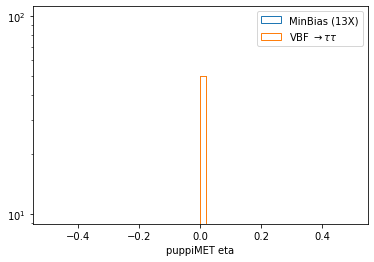

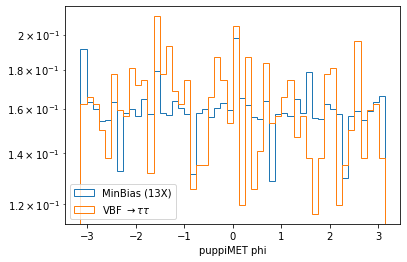

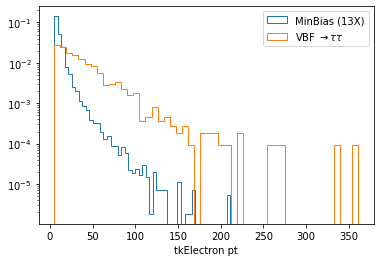

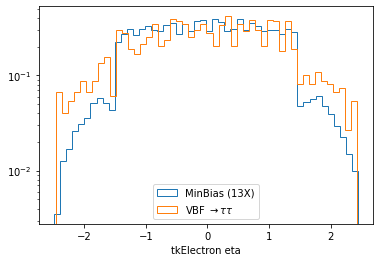

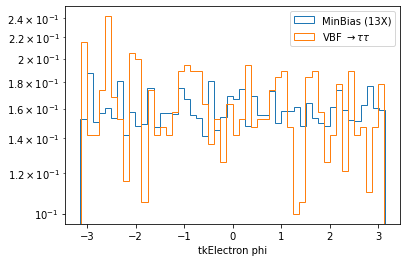

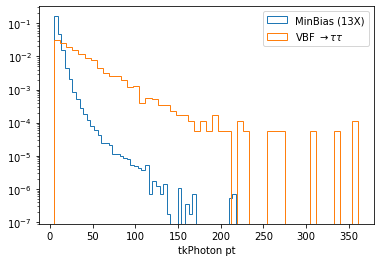

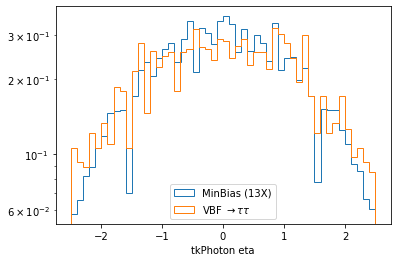

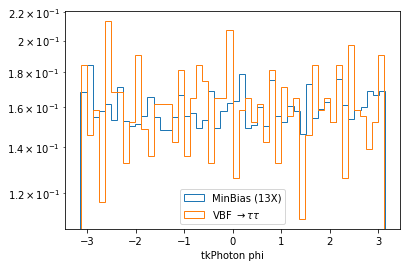

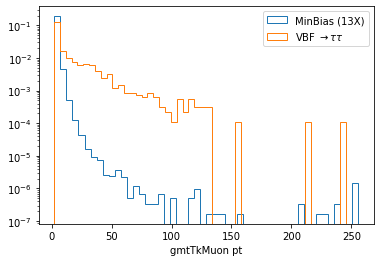

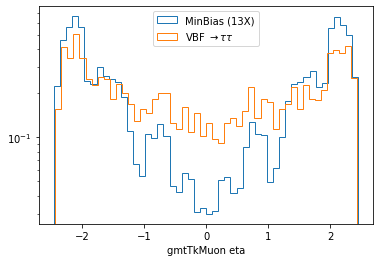

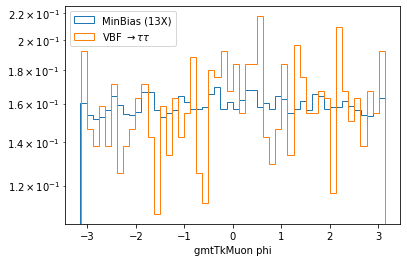

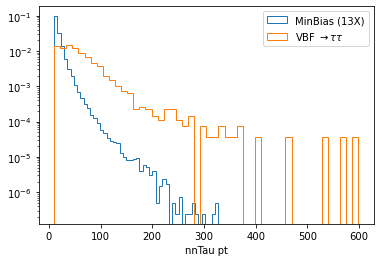

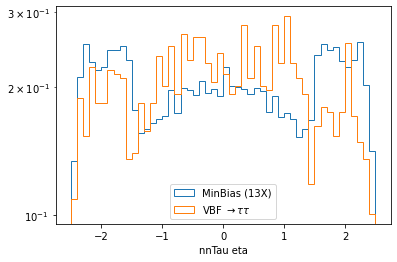

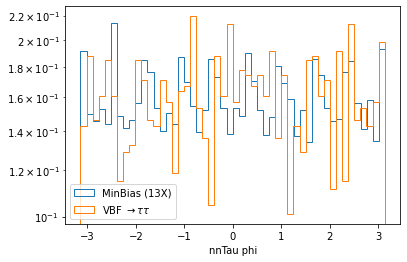

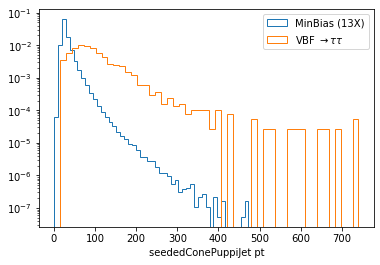

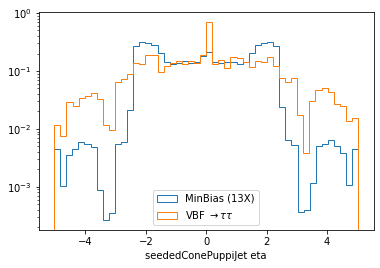

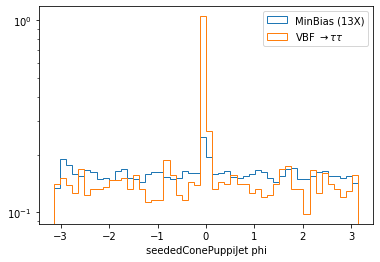

82/82 [==============================] - 0s 1ms/step


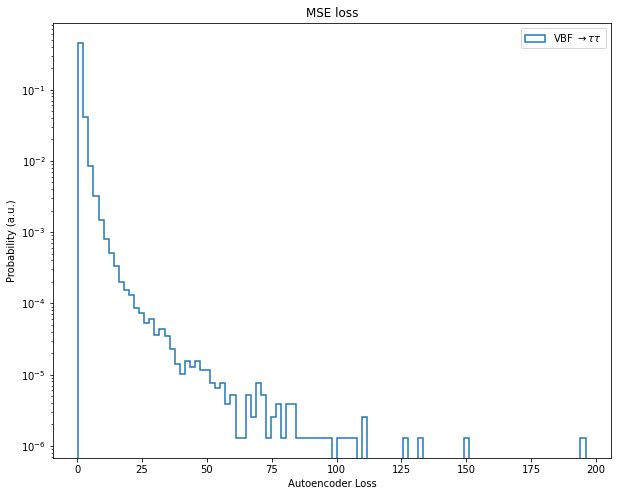

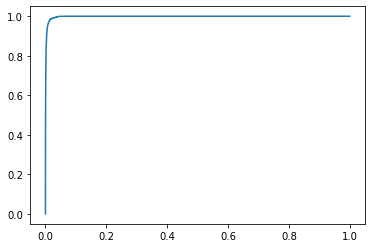

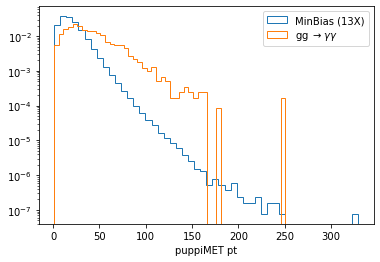

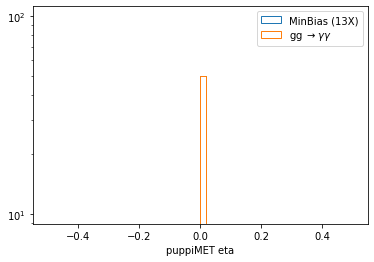

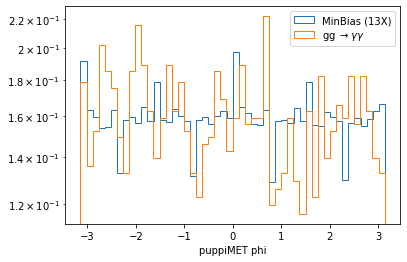

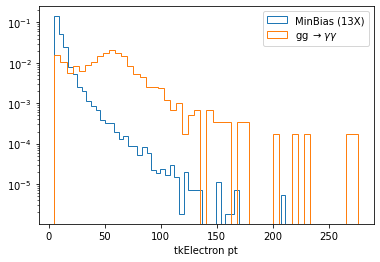

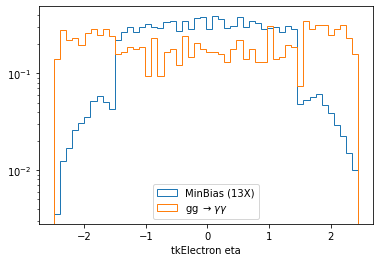

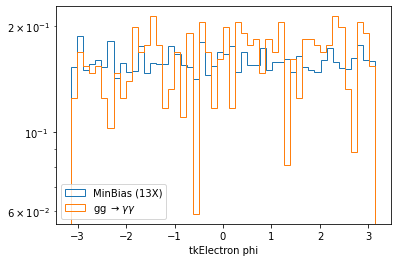

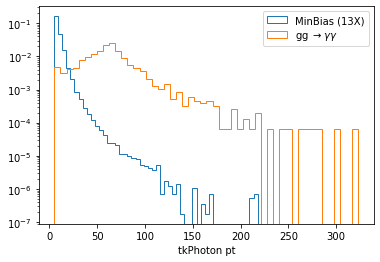

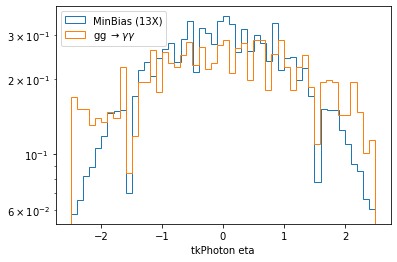

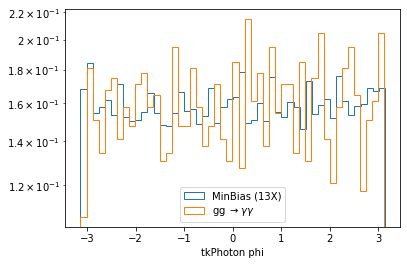

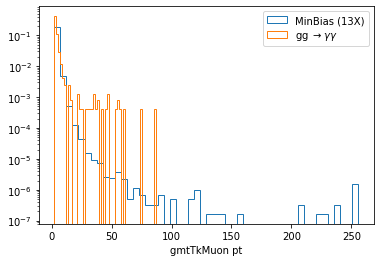

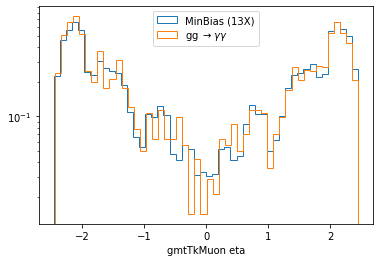

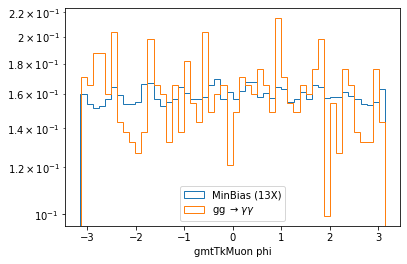

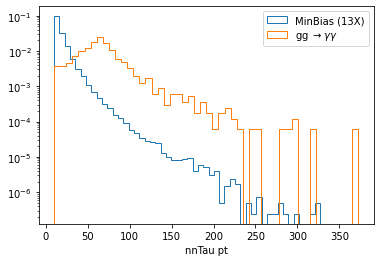

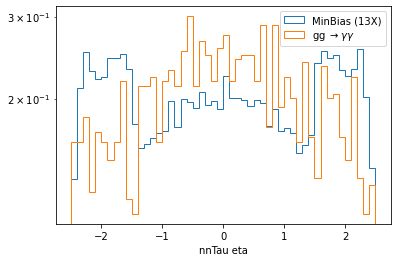

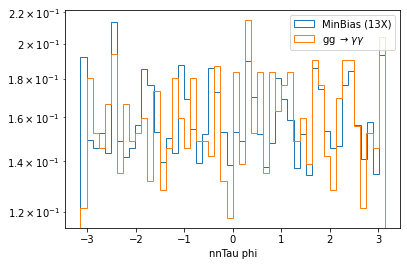

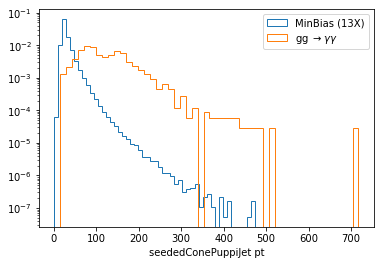

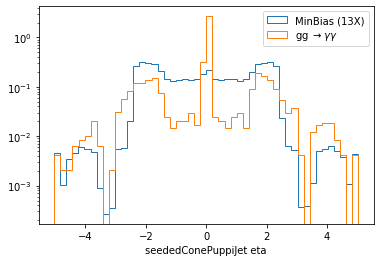

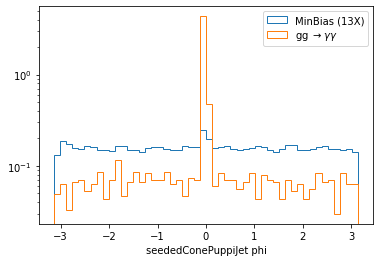

76/76 [==============================] - 0s 1ms/step


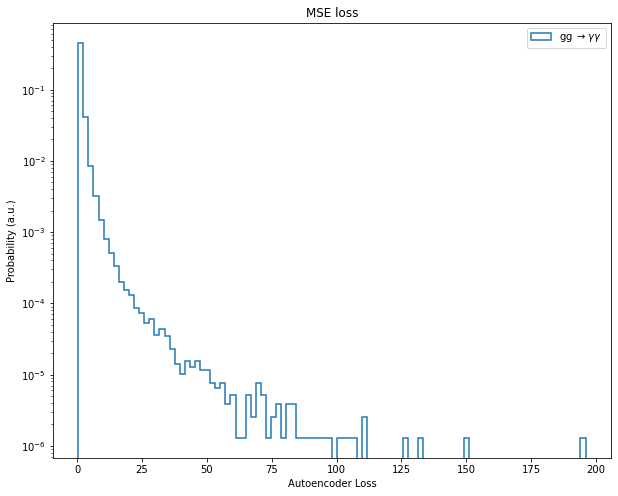

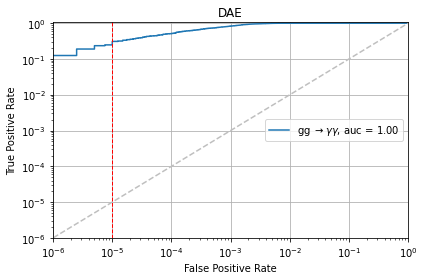

<Figure size 432x288 with 0 Axes>

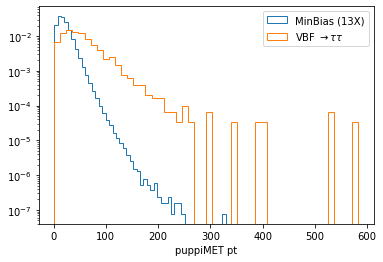

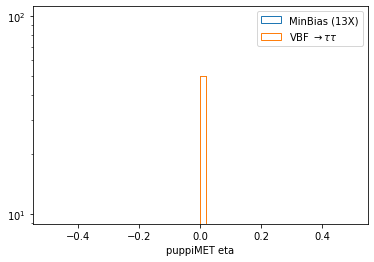

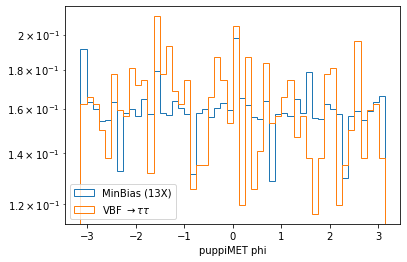

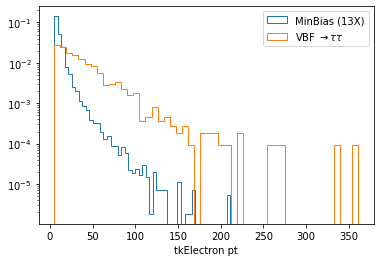

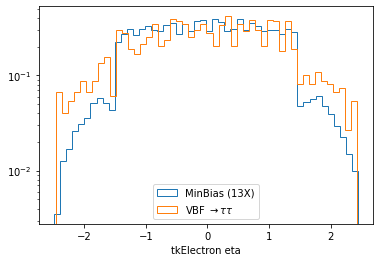

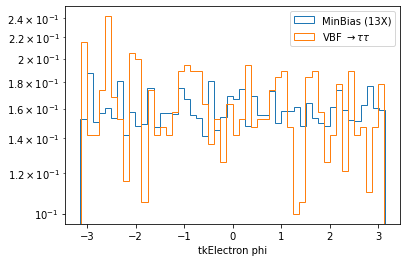

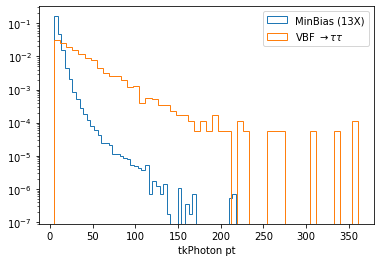

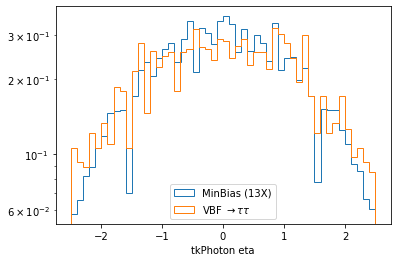

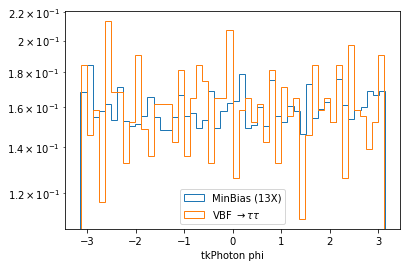

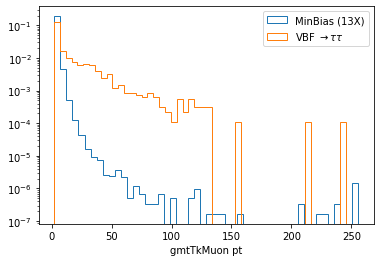

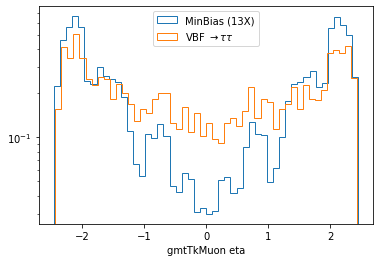

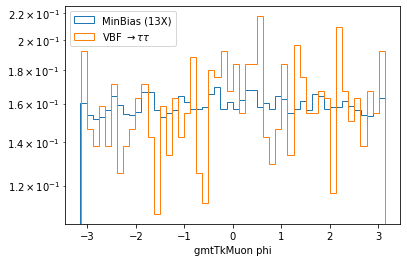

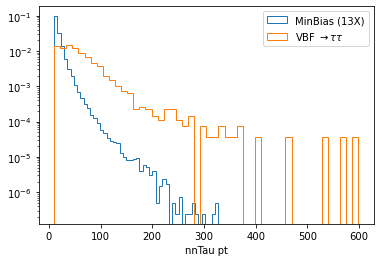

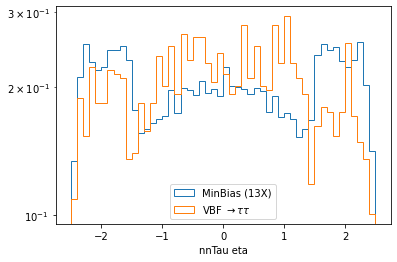

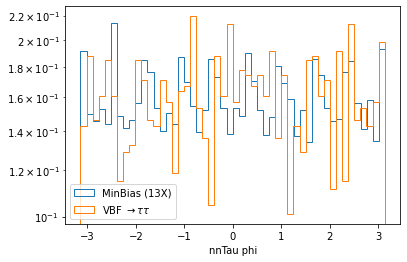

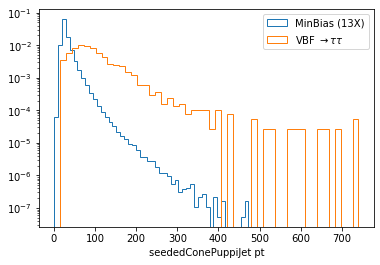

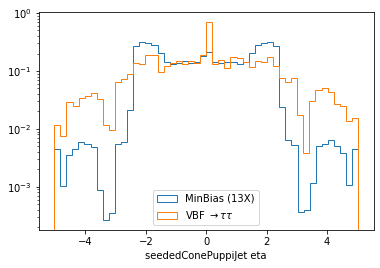

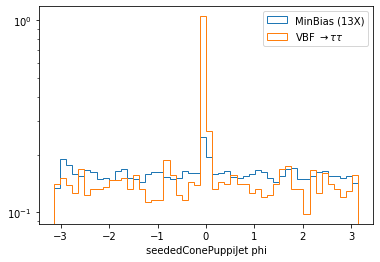

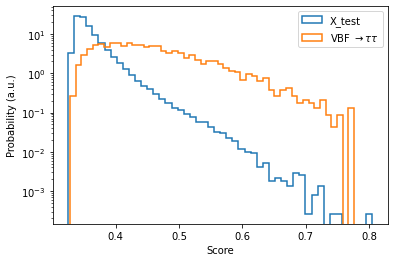

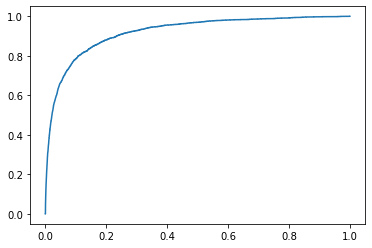

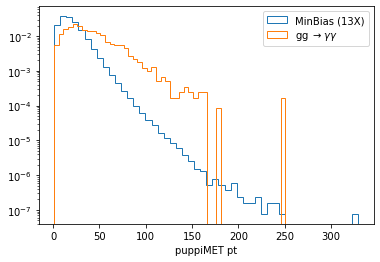

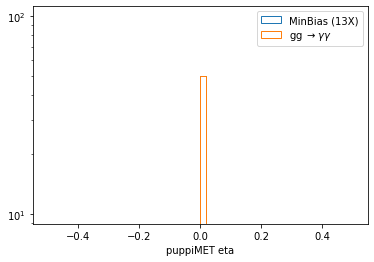

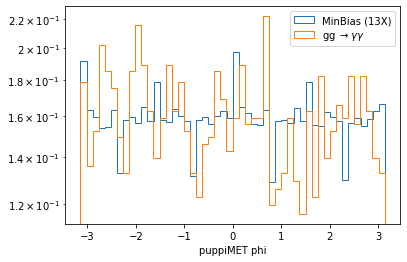

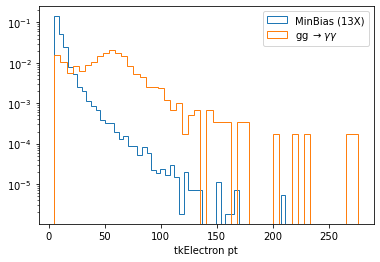

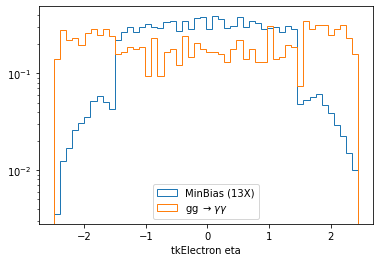

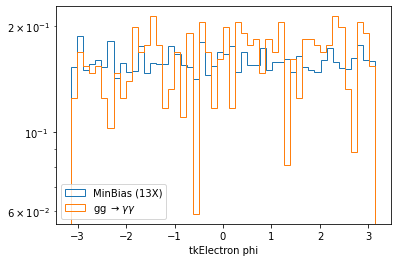

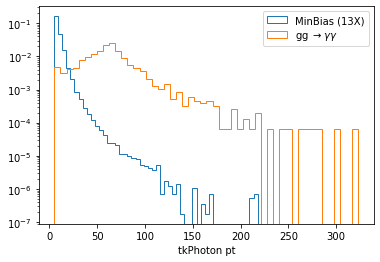

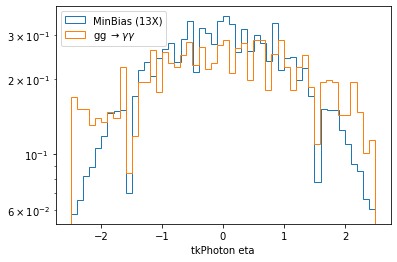

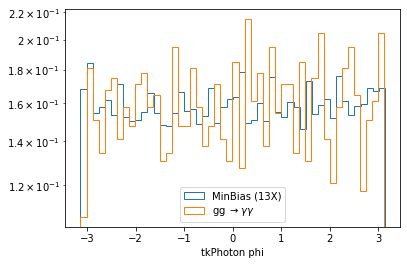

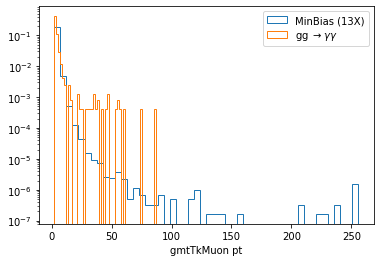

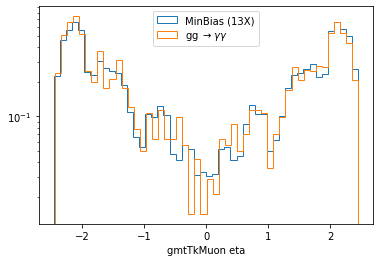

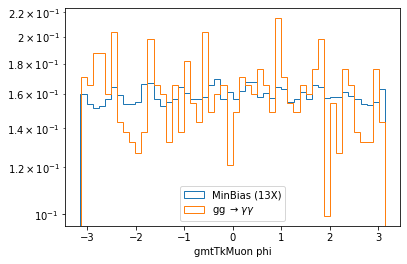

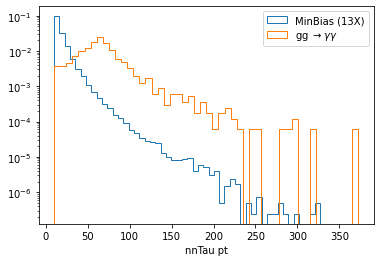

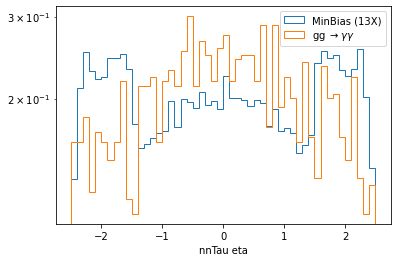

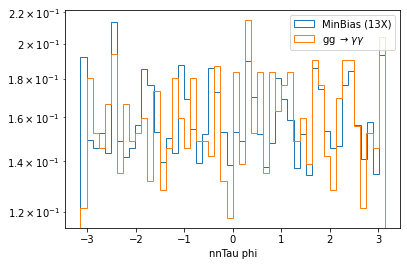

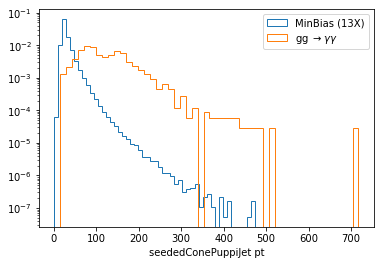

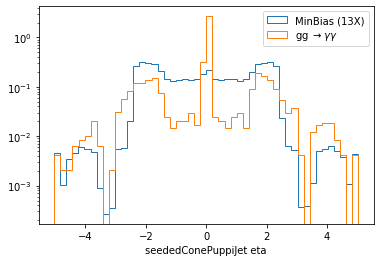

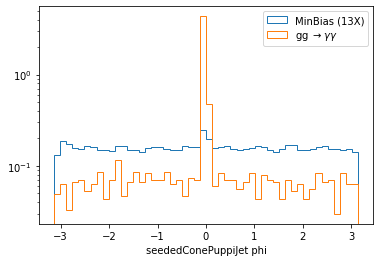

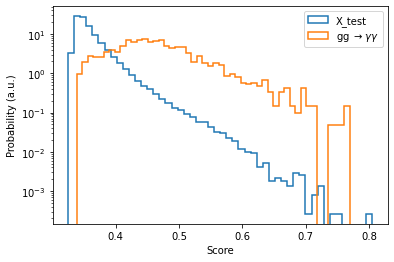

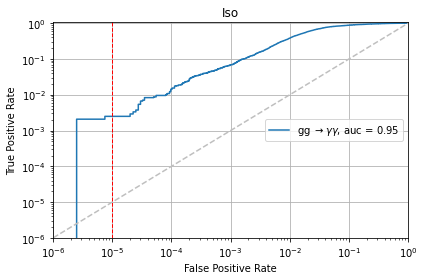

In [4]:
for sig, label in zip([vbf, gg], ["VBF", "gg"]):
    if label == "VBF":
        process = r'VBF $\rightarrow \tau \tau$'
    elif label == "gg":
        process = r'gg $\rightarrow \gamma \gamma$'
        
    data = signal_formatting(sig, background, process)
    with h5py.File(label+"_signal.h5", "w") as f:
        dataset = f.create_dataset(label+"_sig", data=data)

In [5]:
with h5py.File("VBF_signal.h5", "r") as file:
        vbf_data = np.array(file["VBF_sig"])
        
with h5py.File("gg_signal.h5", "r") as file:
        gg_data = np.array(file["gg_sig"])

82/82 [==============================] - 0s 1ms/step
Shape of signal_results:  [[['VBF $\\rightarrow \\tau \\tau$'], array([[61.75      ,  0.        , -1.41808001, ...,  8.75      ,
        -1.03390312,  0.30142725],
       [62.3125    ,  0.        , -2.95833306, ..., 10.75      ,
         0.24850489,  0.77696127],
       [44.375     ,  0.        ,  1.24791041, ...,  8.75      ,
        -2.16828179,  1.68891287],
       ...,
       [26.6875    ,  0.        , -1.04283422, ...,  9.75      ,
         1.29621375,  3.10247612],
       [57.75      ,  0.        , -2.25147472, ...,  0.        ,
         0.        ,  0.        ],
       [38.75      ,  0.        , -2.30383459, ..., 11.75      ,
         1.33072841,  2.2296412 ]]), array([[ 5.8129662e+01,  3.7664406e-02,  1.5642615e-01, ...,
         7.5087824e+00, -2.0092714e-01,  1.9164279e-01],
       [ 4.7432919e+01,  6.2664375e-02,  3.8003579e-01, ...,
         1.0185625e+01, -3.7102106e-01,  4.9805254e-01],
       [ 4.2400703e+01,  2.068318

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


76/76 [==============================] - 0s 1ms/step
Shape of signal_results:  [[['gg $\\rightarrow \\gamma \\gamma$'], array([[28.5       ,  0.        ,  0.73303828, ...,  0.        ,
        -3.6171267 ,  0.08743691],
       [54.6875    ,  0.        ,  0.49741883, ...,  9.75      ,
        -1.80166054,  1.01242733],
       [62.4375    ,  0.        ,  1.07337748, ...,  8.75      ,
        -0.59748554, -0.93802929],
       ...,
       [30.25      ,  0.        , -1.57515964, ..., 11.75      ,
        -2.00261188, -1.41816533],
       [74.8125    ,  0.        , -1.30027028, ...,  8.75      ,
        -1.36984491, -1.14281571],
       [18.3125    ,  0.        , -2.25583804, ...,  7.75      ,
        -0.7593205 ,  1.54471874]]), array([[ 2.8588137e+01,  2.9088557e-02,  2.5443274e-01, ...,
         3.6681075e+00, -1.9529659e-01,  2.7355942e-01],
       [ 6.4593918e+01, -1.3506932e-02,  3.5492054e-01, ...,
         7.5113554e+00, -3.3811760e-01,  3.6869034e-01],
       [ 5.9495842e+01,  4.356

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


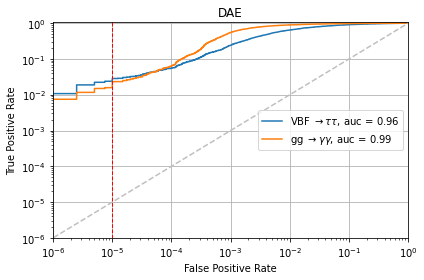

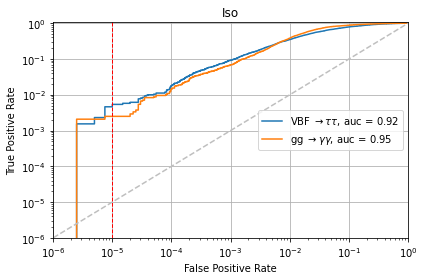

In [6]:
for model, name in zip(['model_directorynew_try', 'isolation_forest_model.joblib'], ["DAE", "Iso"]):
    plt.figure()
    for process, data in zip([r'VBF $\rightarrow \tau \tau$', r'gg $\rightarrow \gamma \gamma$'], [vbf_data, gg_data]):
        fpr, tpr, auc = signal_prediction(data, process, 'correct_inputs_node_56.h5', model, name)
        plt.plot(fpr, tpr, "-", lw=1.5, label=f"{process}, auc = {auc:.2f}")
    
    plt.plot(np.linspace(0, 1),np.linspace(0, 1), '--', color='0.75')
    plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
    plt.title(name)
    plt.xlim([10**(-6), 1])
    plt.ylim([10**(-6), 1.05])
    plt.semilogx()
    plt.semilogy()
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.legend(loc='center right')
    plt.grid(True)
    plt.tight_layout() 
    plt.savefig(name+"_ROC.png")
    plt.show()